### 1. Setting graph specifications

In [1]:
global graph_opts1 ///
	title(, justification(left) color(black) span pos(11)) ///
	graphregion(color(white) lc(white) lw(med) la(center)) /// <- remove la(center) for Stata < 15
	ylab(,angle(0) nogrid)  ///
	yscale(noline) legend(region(lc(none) fc(none)))


global pct `" 0 "0%" .25 "25%" .5 "50%" .75 "75%" 1 "100%" "'

*set matsize 5000

### 2. Uploading data (.dta)

In [2]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Bar%20plots/Horizontal%20stack%20bar%20plot/data.dta", clear

### 3. Ensuring that there is no memory under the name ``theResults``

In [3]:
cap mat drop theResults

### 4. Creating a matrix and creating variable from the matrix

In [4]:
	local x = 0
	qui foreach var of varlist ///
		correct treat_cxr re_3 re_4 treat_refer ///
		med_any med_l_any_1 med_l_any_2 med_l_any_3 med_k_any_9 {

		mean `var' [pweight = weight_city]
		mat a = e(b)
		local mean = a[1,1]
		local mean = string(round(100*`mean',0))
		local mean = substr("`mean'",1,strpos("`mean'",".")+1)

		local ++x
		local theLabel : var label `var'
		local theLabels `" `theLabels' `x' "`theLabel'" "' // [`mean'%]

		cap mat drop theResult
		reg `var' i.city [pweight = weight_city]
			local theR21 = `e(r2)'
			mat theResult = nullmat(theResult) , [`theR21']

		reg `var' i.city i.case [pweight = weight_city]
			local theR22 = `e(r2)' - `theR21'
			mat theResult = nullmat(theResult) , [`theR22']

		reg `var' i.city i.case i.type_formal  [pweight = weight_city]
			local theR23 = `e(r2)' - `theR21' - `theR22'
			mat theResult = nullmat(theResult) , [`theR23']

		reg `var' i.city i.case i.type_formal i.sp_city_id  [pweight = weight_city]
			local theR24 = `e(r2)' - `theR21' - `theR22' - `theR23'
			mat theResult = nullmat(theResult) , [`theR24']

		reg `var' i.city i.case i.type_formal i.sp_city_id i.sp_city_mbbs [pweight = weight_city]
			local theR25 = `e(r2)' - `theR21' - `theR22' - `theR23' - `theR24'
			mat theResult = nullmat(theResult) , [`theR25']

		mean `var' [pweight = weight_city]
		mat a = e(b)
		local mean = a[1,1]
		mat theResult = nullmat(theResult) , [`mean']

			mat theResults = nullmat(theResults) \ theResult
			matlist theResults

			}

clear
qui svmat theResults
qui gen n = _n

label def n `theLabels'
label val n n




. clear

. qui svmat theResults

. qui gen n = _n

. label def n `theLabels'

. label val n n


### 5. Creating the graph


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


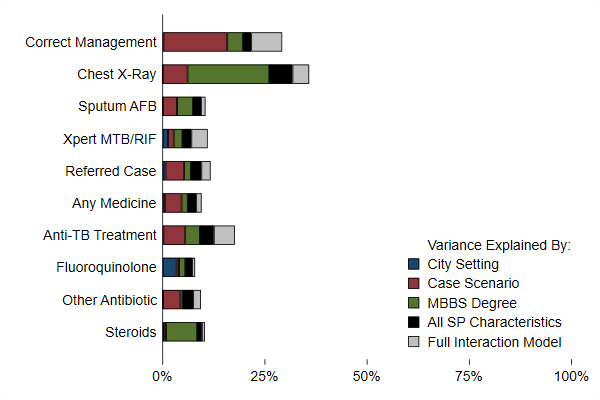

In [5]:
graph bar (sum) theResults1 theResults2 theResults3 theResults4 theResults5  ///
	, ylab($pct) $graph_opts1 hor stack over(n) xsize(6) ///
	bar(1, lc(black) lw(thin)) ///
	bar(2, lc(black) lw(thin)) ///
	bar(3, lc(black) lw(thin)) ///
	bar(4, fc(black) lc(black) lw(thin)) ///
	bar(5, fc(gs12) lc(black) lw(thin)) ///
	legend(pos(5) ring(0) c(1) symxsize(small) symysize(small)  ///
	order(6 "Variance Explained By:" 1 "City Setting" 2 "Case Scenario" 3 "MBBS Degree" 4 "All SP Characteristics" 5 "Full Interaction Model"  ))

### 6. Exporting the graph

In [6]:
qui graph export "figure.png" , replace width(1000)